In [1]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')
edgelist.head(10)

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0
5,o_rs,y_rs,rs,0.12,red,0
6,y_rs,rs_end_south,rs,0.39,red,0
7,rc_end_north,v_rc,rc,0.70,red,0
8,v_rc,b_rc,rc,0.04,red,0
9,b_rc,g_rc,rc,0.15,red,0


### EdgeList dataset
<ul>
    <li><b>Nodes:</b> connected nodes</li>
    <li><b>Trail:</b> edge indicating the abbreviated name of trail for each edge.</li>
    <li><b>Distance:</b> length in miles</li>
    <li><b>Color:</b> trail color (for plots)</li>
</ul>



In [18]:
nodelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')
nodelist.head(10)

,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771
5,b_gy2,2000,983
6,b_o,2039,1012
7,b_rc,1311,979
8,b_rd,268,1744
9,b_rd_dupe,268,1744


## <code>Network X</code>

### 1. Creating a Graph
Node lists are usually optional in <code>networkx</code> and other graph libraries when edge lists are provided because the node names are provided in the edge list's first two columns. 

In [40]:
#create empty graph
g = nx.Graph()

#add edges along with edge attributes e.g. distance
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

#preview first 5 edges    
list(g.edges(data=True))[0:5]

[('rs_end_north',
  'v_rs',
  {'attr_dict': {'trail': 'rs',
    'distance': 0.3,
    'color': 'red',
    'estimate': 0}}),
 ('v_rs',
  'b_rs',
  {'attr_dict': {'trail': 'rs',
    'distance': 0.21,
    'color': 'red',
    'estimate': 0}}),
 ('v_rs',
  'v_bv',
  {'attr_dict': {'trail': 'v',
    'distance': 0.52,
    'color': 'violet',
    'estimate': 0}}),
 ('v_rs',
  'v_end_east',
  {'attr_dict': {'trail': 'v',
    'distance': 0.54,
    'color': 'violet',
    'estimate': 0}}),
 ('b_rs',
  'g_rs',
  {'attr_dict': {'trail': 'rs',
    'distance': 0.11,
    'color': 'red',
    'estimate': 0}})]

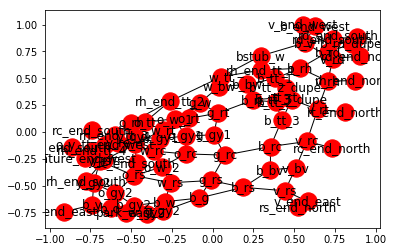

In [57]:
# Add node attributes
for i, nlrow in nodelist.iterrows():
    g.node[nlrow['id']].update(nlrow[1:].to_dict())
    
# Preview first 10 nodes
list(g.nodes(data=True))[0:10]


### 2. Visualising the graph

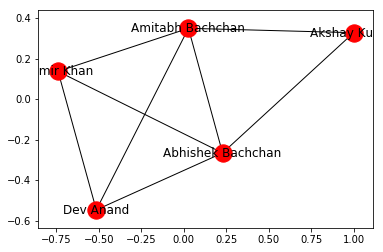

In [48]:
#create a new graph containing network of these random people
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')

nx.draw_networkx(G_symmetric)

In [52]:
#create an asymmetric graph (dirctional graph)
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

nx.spring_layout(G_asymmetric)

{'A': array([-0.0325557 ,  0.16697459]),
 'B': array([-0.17613922,  1.        ]),
 'D': array([ 0.07393155, -0.66712908]),
 'C': array([-0.23903147,  0.23319534]),
 'E': array([ 0.37379485, -0.73304084])}

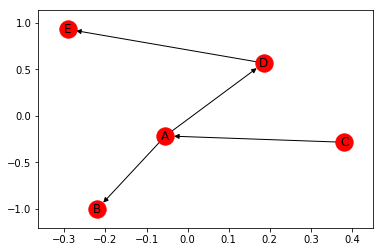

In [54]:
nx.draw_networkx(G_asymmetric)

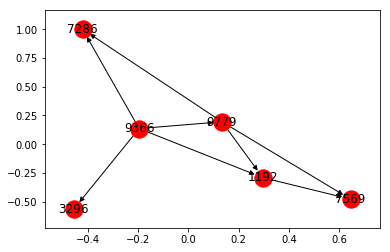

In [73]:
#create a weighted network
G_test = nx.DiGraph()
G_test.add_edge('9366','9779')
G_test.add_edge('9366','7286')
G_test.add_edge('9366','1192')
G_test.add_edge('9366','3296')
G_test.add_edge('9779','7286')
G_test.add_edge('9779','7569')
G_test.add_edge('9779','1192')
G_test.add_edge('1192','7569')
nx.draw_networkx(G_test)

### 3. Trialing with Test Data

In [123]:
cdr_data=pd.read_csv('CDR_temp.csv')
cdr_data.head(10)

,ID,CALLING_NUM,CALLED_NUM,START_TIME,END_TIME,CALL_TYPE,CHARGE,CALL_RESULT
0,f7c2aed3-8209-472f-afa6-6a1dc4a0e0b6,8131166797,3470914600,2016-03-04T00:10:05.681+05:30,2016-03-04T00:10:05.681+05:30,SMS,0.842894,ANSWERED
1,49dde45a-dd7e-4568-9432-549fe59cb658,9149565512,3539212588,2016-01-17T07:28:39.157+05:30,2016-01-17T07:31:25.587+05:30,VOICE,0.522687,ANSWERED
2,fca332c0-d0e7-43cd-8918-133de466c19d,3917407842,3976557336,2016-03-05T18:44:51.669+05:30,2016-03-05T18:44:51.669+05:30,SMS,0.928346,ANSWERED
3,c94c4ef7-128c-4d16-82db-bb70a05c4948,1190111696,4794533137,2016-02-02T09:30:57.015+05:30,2016-02-02T09:33:30.020+05:30,VOICE,0.437132,ANSWERED
4,d802f413-060c-4800-9319-2ae3ed9cb9b3,4947005879,5596524704,2016-01-27T01:56:35.448+05:30,2016-01-27T01:59:23.904+05:30,VOICE,0.408260,ANSWERED
5,ff51c7fb-48e6-4dc5-bd91-62352d07608b,2339563418,4229486404,2016-01-22T07:51:16.941+05:30,2016-01-22T07:51:16.941+05:30,SMS,0.624831,ANSWERED
6,d070d101-f383-43e3-ac70-e42ecb176235,1874571022,9163944393,2016-03-02T00:07:07.179+05:30,2016-03-02T00:09:22.678+05:30,VOICE,0.090432,ANSWERED
7,99102812-fe69-4c2c-930d-c27616f62915,1350057252,2751071043,2016-02-19T21:09:14.280+05:30,2016-02-19T21:11:45.164+05:30,VOICE,0.191289,ANSWERED
8,7b549f79-7bef-4a85-9788-c18a7d24b925,3701263930,8504596517,2016-01-29T01:26:11.234+05:30,2016-01-29T01:28:23.702+05:30,VOICE,0.547491,ANSWERED
9,04b3e83b-edbf-4bc0-8d14-0bf65a672159,2689744648,9413615188,2016-01-27T08:14:58.783+05:30,2016-01-27T08:14:58.783+05:30,SMS,0.367052,ANSWERED


In [133]:
#reviewing datatypes
cdr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
ID             99 non-null object
CALLING_NUM    99 non-null int64
CALLED_NUM     99 non-null int64
START_TIME     99 non-null object
END_TIME       99 non-null object
CALL_TYPE      99 non-null object
CHARGE         99 non-null float64
CALL_RESULT    99 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 6.3+ KB


In [155]:
#changing data types
cdr_data["START_TIME"] = pd.to_datetime(cdr_data['START_TIME'])
cdr_data["END_TIME"] = pd.to_datetime(cdr_data['END_TIME'])
cdr_data.info()
cdr_data["END_TIME"][4]-cdr_data["START_TIME"][4]

#new attribute for duration
cdr_data['DURATION']=cdr_data["END_TIME"]-cdr_data["START_TIME"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
ID             99 non-null object
CALLING_NUM    99 non-null int64
CALLED_NUM     99 non-null int64
START_TIME     99 non-null datetime64[ns]
END_TIME       99 non-null datetime64[ns]
CALL_TYPE      99 non-null object
CHARGE         99 non-null float64
CALL_RESULT    99 non-null object
DURATION       99 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(3), timedelta64[ns](1)
memory usage: 7.0+ KB


In [135]:
nodes_data=cdr_data[['CALLING_NUM','CALLED_NUM','CHARGE']]

#create graph
G = nx.DiGraph()

#add edges along with edge attributes e.g. distance
for i, elrow in cdr_data.iterrows():
    G.add_edge(elrow[1], elrow[2], attr_dict=elrow[3:].to_dict())

#preview first 5 edges    
list(G.edges(data=True))[0:5]


[(8131166797,
  3470914600,
  {'attr_dict': {'START_TIME': '2016-03-04T00:10:05.681+05:30',
    'END_TIME': '2016-03-04T00:10:05.681+05:30',
    'CALL_TYPE': 'SMS',
    'CHARGE': 0.8428940999999999,
    'CALL_RESULT': 'ANSWERED'}}),
 (9149565512,
  3539212588,
  {'attr_dict': {'START_TIME': '2016-01-17T07:28:39.157+05:30',
    'END_TIME': '2016-01-17T07:31:25.587+05:30',
    'CALL_TYPE': 'VOICE',
    'CHARGE': 0.52268726,
    'CALL_RESULT': 'ANSWERED'}}),
 (3917407842,
  3976557336,
  {'attr_dict': {'START_TIME': '2016-03-05T18:44:51.669+05:30',
    'END_TIME': '2016-03-05T18:44:51.669+05:30',
    'CALL_TYPE': 'SMS',
    'CHARGE': 0.92834604,
    'CALL_RESULT': 'ANSWERED'}}),
 (1190111696,
  4794533137,
  {'attr_dict': {'START_TIME': '2016-02-02T09:30:57.015+05:30',
    'END_TIME': '2016-02-02T09:33:30.020+05:30',
    'CALL_TYPE': 'VOICE',
    'CHARGE': 0.4371317,
    'CALL_RESULT': 'ANSWERED'}}),
 (4947005879,
  5596524704,
  {'attr_dict': {'START_TIME': '2016-01-27T01:56:35.448+05:30

In [136]:
print('# of edges: {}'.format(G.number_of_edges()))
print('# of nodes: {}'.format(G.number_of_nodes()))

# of edges: 99
# of nodes: 198


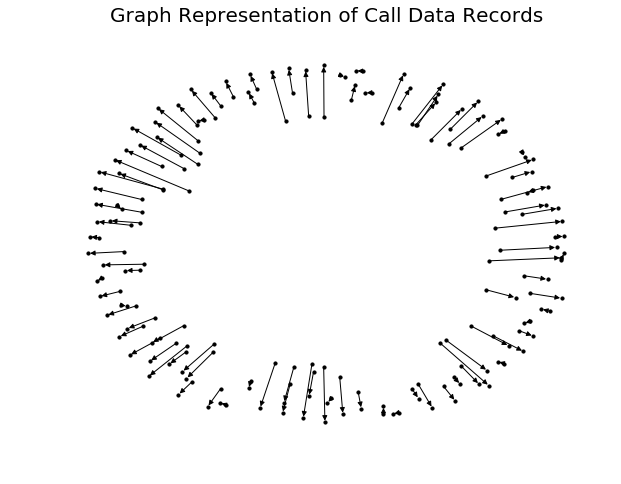

In [141]:
#plotsssss
plt.figure(figsize=(8, 6))
nx.draw(G, node_size=10, node_color='black')
plt.title('Graph Representation of Call Data Records', size=20)
plt.show()